<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/GMM_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
dat=read.csv("encoded_combined_features.csv")
dat.hsi=dat[dat$hsi_code %in% c("5","5.0","5R","6","6.0")|dat$excellencia_hsi_status_x=="HSI",]
dat.hsi=dat.hsi[dat.hsi$excellencia_hsi_status_x!="",]
dim(dat);dim(dat.hsi)
table(dat$DoE,dat$hsi_code)
table(dat$excellencia_hsi_status_x,dat$hsi_code)
#names(dat)

[1] 2427  868

[1] 564 868

              
                 1 1.0   2 2.0   3 3.0   4 4.0  4R   5 5.0  5R   6 6.0
               106 731  57 127  20 222  11  71   0  63 221   0  95 207
  Emerging HSI   0   0   0   0   0   0   2  21   2   0   0   0   0   0
  HSI            0   0   0   0   0   0   0   0   0  16  37   4  18  45
  Non-HSI       28 218  14  30   9  52   0   0   0   0   0   0   0   0

              
                 1 1.0   2 2.0   3 3.0   4 4.0  4R   5 5.0  5R   6 6.0
                27 172  66 135   3  63   3  22   1  15  53   1  28  64
  Emerging HSI   0  19   0   0  10  17   8  42   1  32 100   3  35 109
  HSI            0   1   0   0   5   4   0   9   0  22  57   0  38  74
  Not HSI      107 757   5  22  11 190   2  19   0  10  48   0  12   5

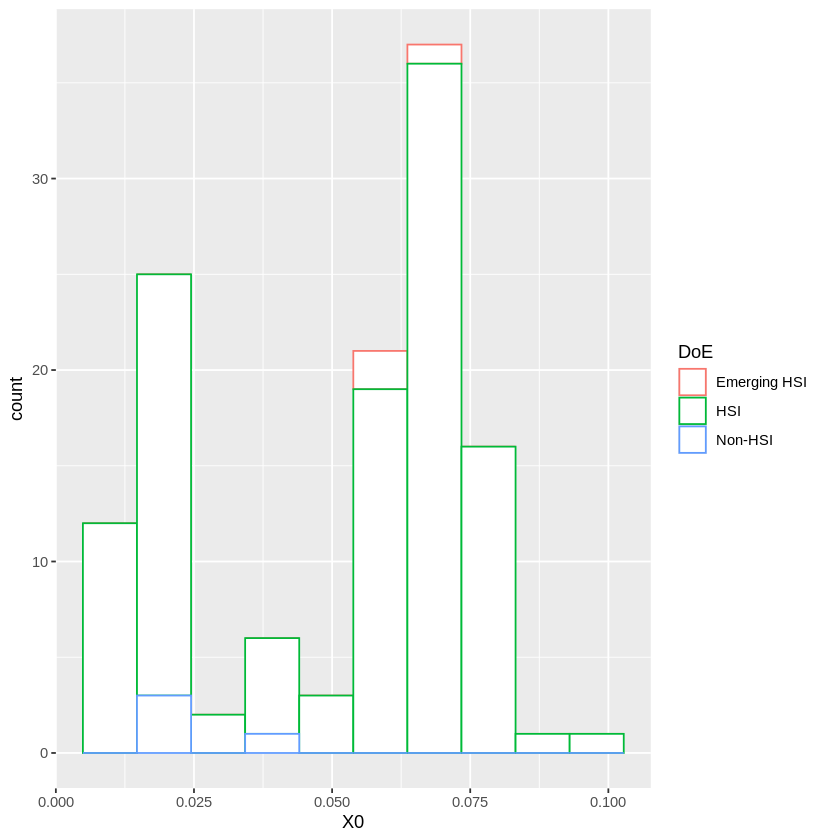

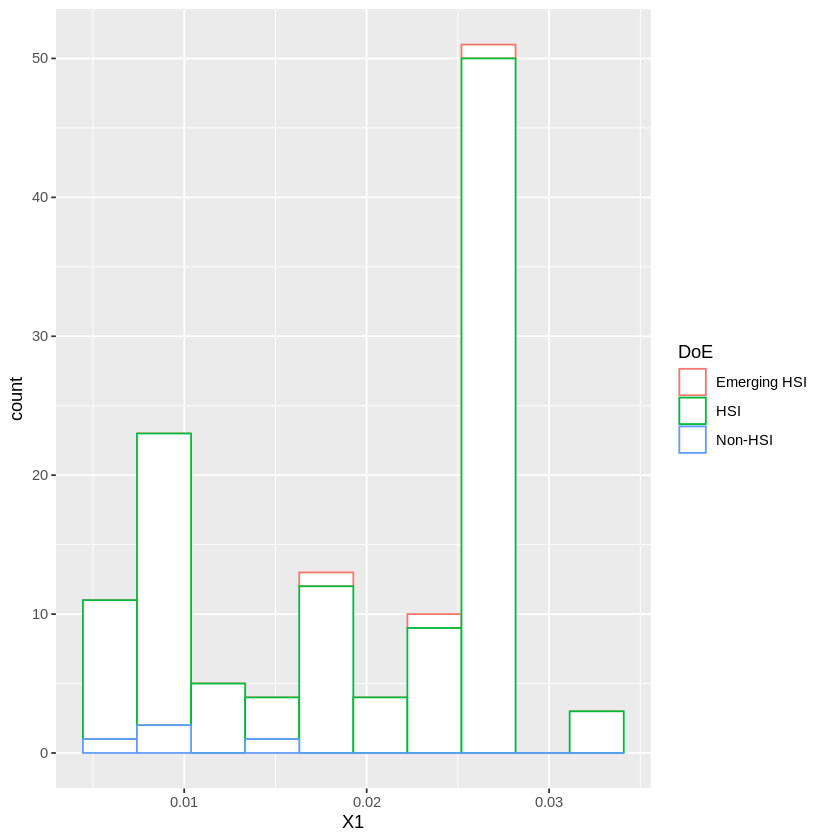

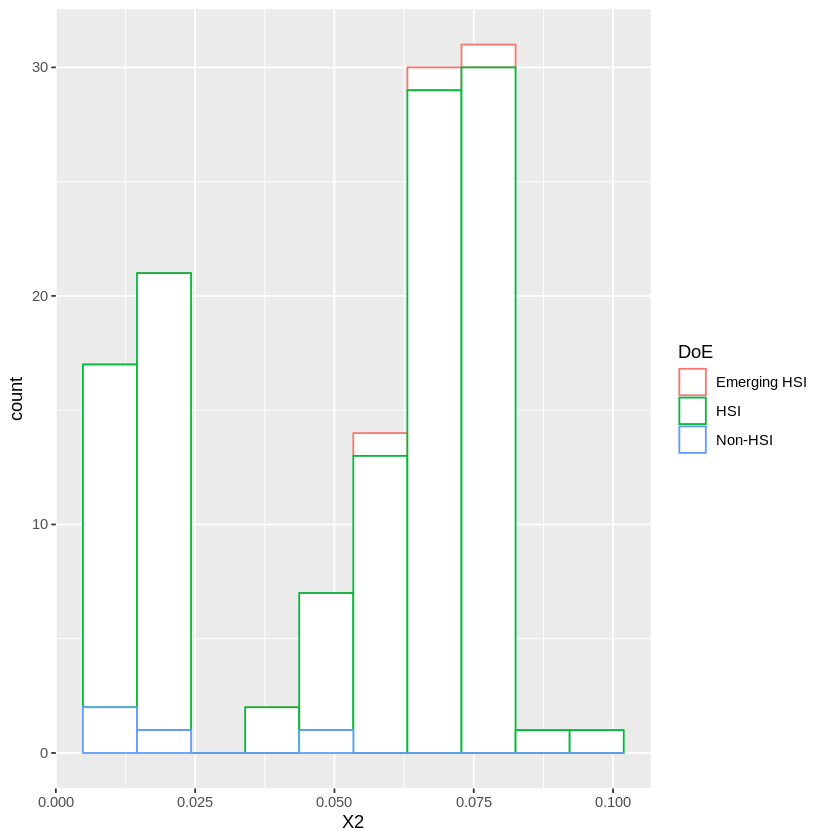

In [123]:
library(ggplot2)


ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X0,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X1,color=DoE))+
  geom_histogram(fill="white",bins=10)

ggplot(dat.hsi[dat.hsi$year_x=="2017",],aes(x=X2,color=DoE))+
  geom_histogram(fill="white",bins=10)

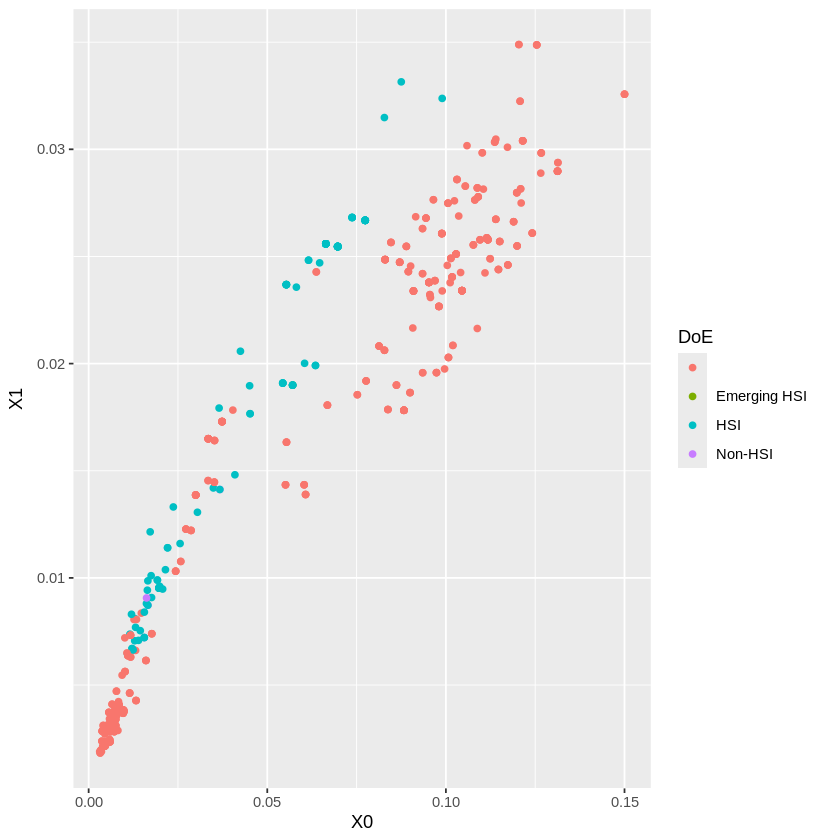

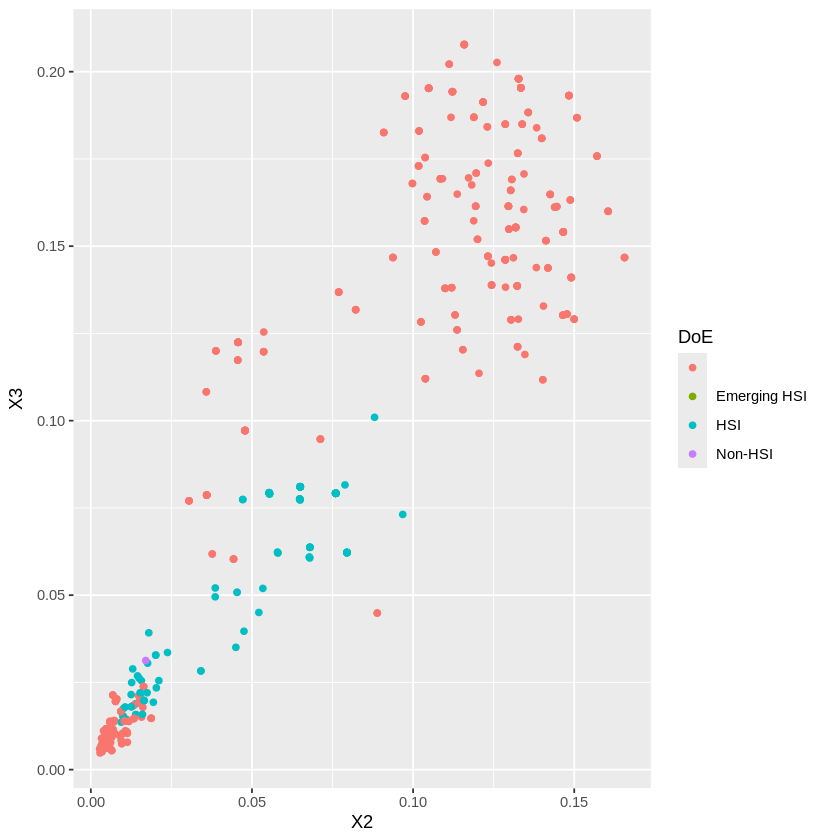

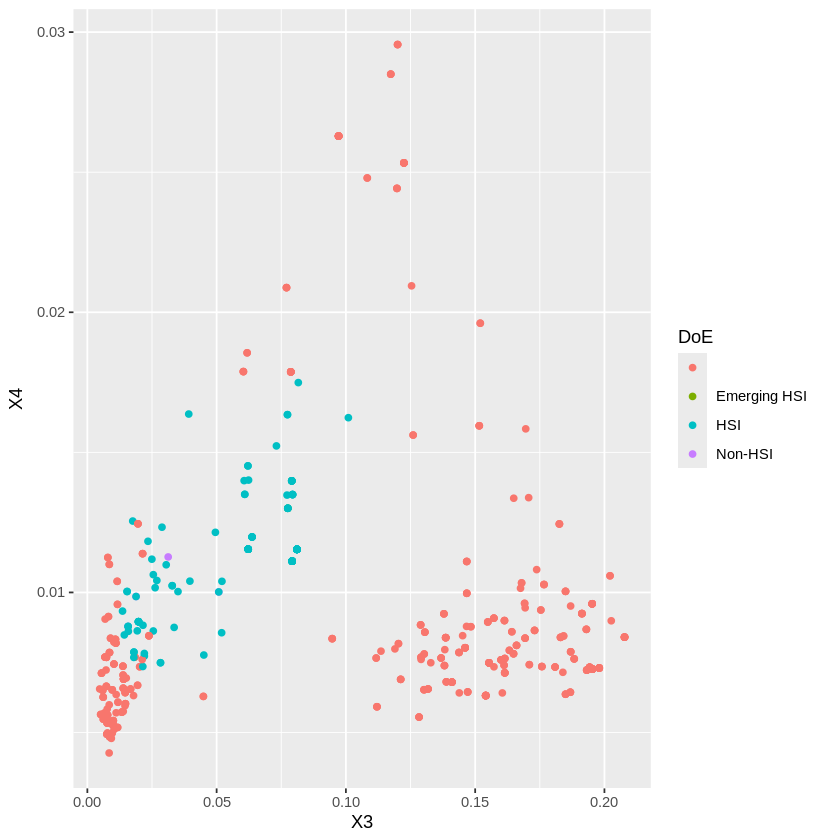

In [125]:
ggplot(dat.hsi,aes(x=X0,y=X1,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X2,y=X3,color=DoE))+
  geom_point()

ggplot(dat.hsi,aes(x=X3,y=X4,color=DoE))+
  geom_point()

In [ ]:
install.packages("flexmix")
library(flexmix)
#

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2 : * * *
3 : * * *
4 : * * *
5 : * * *
2 : * * *
3 : * * *
4 : * * *
5 : * * *


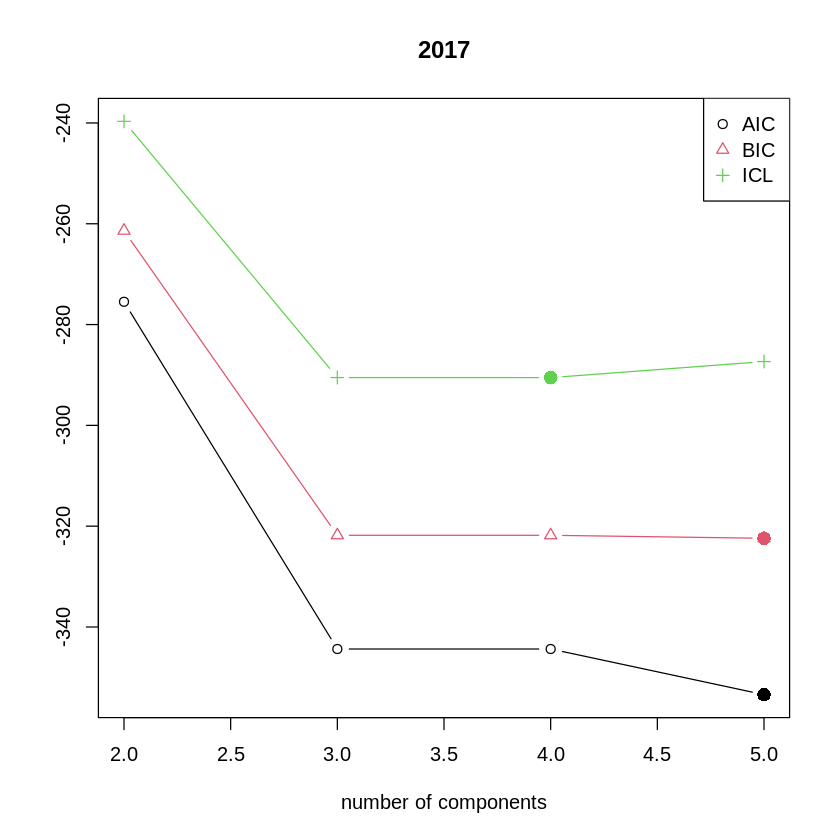

2 : * * *
3 : * * *
4 : * * *
5 : * * *


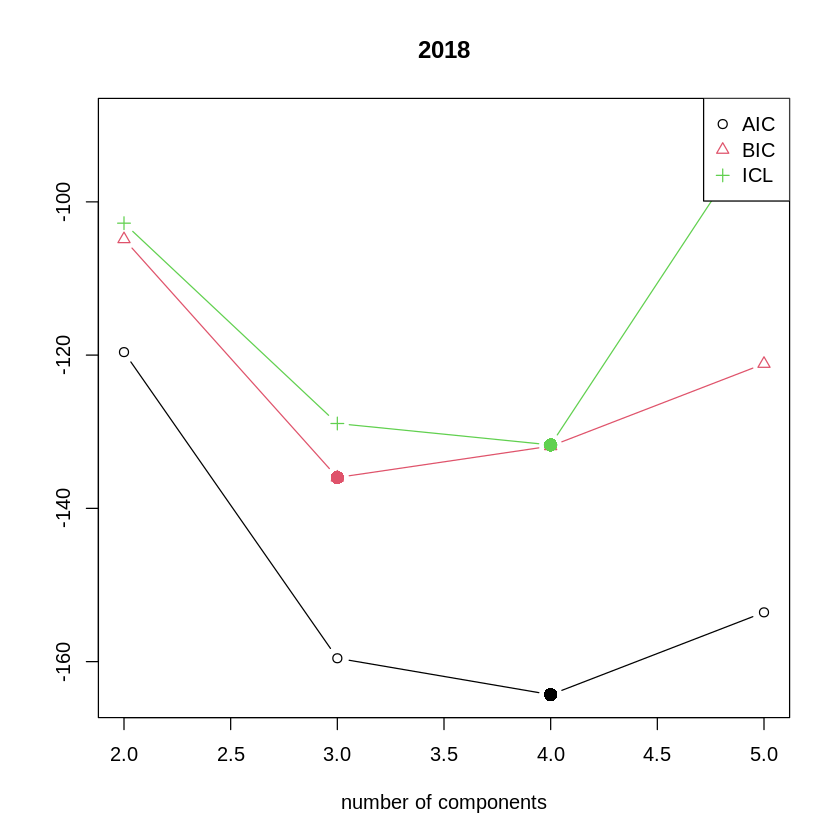

2 : * * *
3 : * * *
4 : * * *
5 : * * *


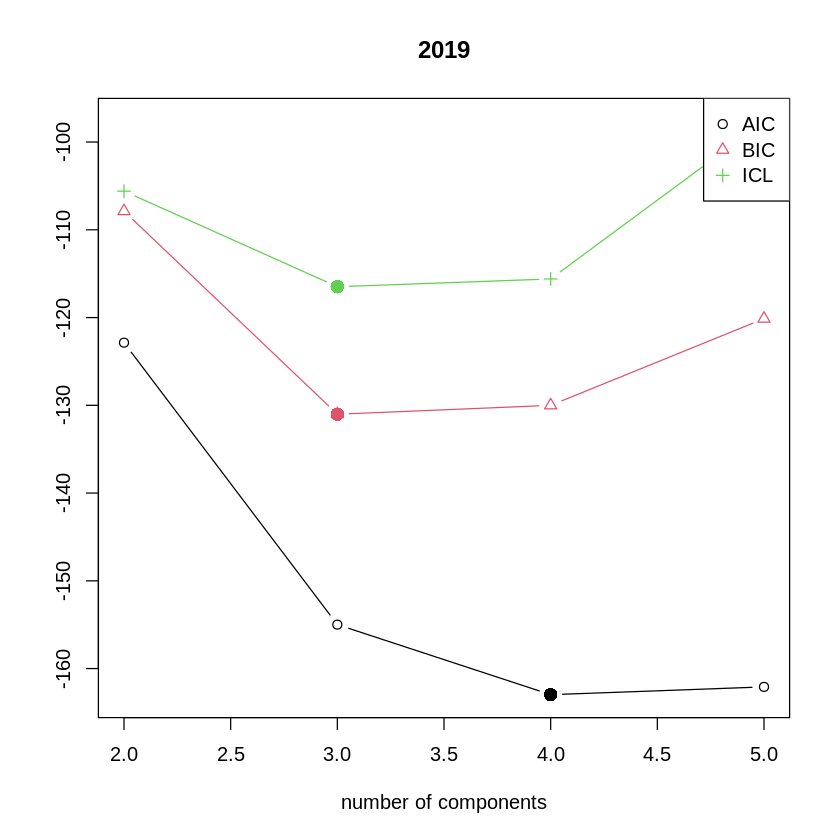

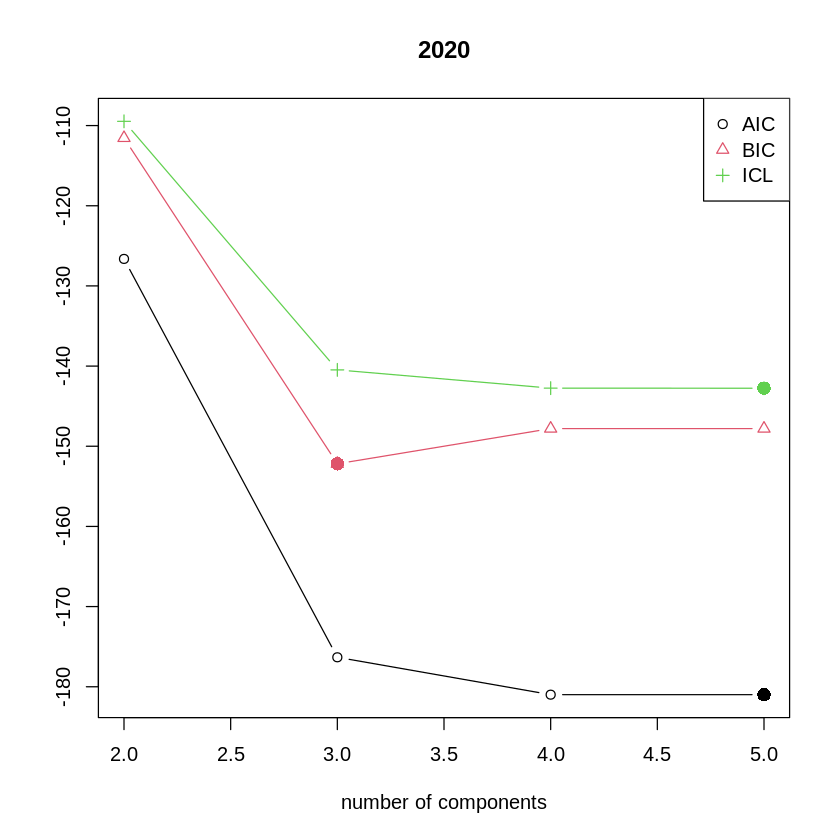

In [126]:

# Fit a GMM with 2 latent classes and linear growth trajectories
# The FLXMRglm driver is used for standard linear models within each class.
# The formula specifies the growth model.
# k specifies the number of latent classes.
# cluster is used to group observations by individual for longitudinal data.
#model_gmm <- flexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid, data = dat.hsi, k = 2, model = FLXMRglm())
#summary(model_gmm)
# You can also try different numbers of classes and compare models using BIC or ICL:

#ex2 <- initFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ year_x | unitid,data = dat.hsi, k = 2:5, model = FLXMCmvnorm(diagonal = FALSE),
#                   control = list(minprior = 0), nrep = 2)
#ex2
#plot(ex2)


set.seed(32335)
gmm2017 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x=="2017",], k = 2:5, model = FLXMRglm())
plot(gmm2017,main="2017") # Visualize BIC/ICL values

gmm2018 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x=="2018",], k = 2:5, model = FLXMRglm())
plot(gmm2018,main="2018") # Visualize BIC/ICL values

gmm2019 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x=="2019",], k = 2:5, model = FLXMRglm())
plot(gmm2019,main="2019") # Visualize BIC/ICL values

gmm2020 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x=="2020",], k = 2:5, model = FLXMRglm())
plot(gmm2020,main="2020") # Visualize BIC/ICL values

#gmm2021 <- stepFlexmix(X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x=="2021",], k = 2:5, model = FLXMRglm())
#plot(gmm2021) # Visualize BIC/ICL values


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x == "2017", 
    ], model = FLXMRglm(), k = 4)

       prior size post>0 ratio
Comp.1 0.483   69     80 0.863
Comp.2 0.235   19    124 0.153
Comp.3 0.282   36     38 0.947

'log Lik.' 180.1833 (df=8)
AIC: -344.3666   BIC: -321.8044 


,Comp.1,Comp.2,Comp.3
coef.(Intercept),0.43295774,0.37895169,0.20966234
sigma,0.02273778,0.08526902,0.01365585


[1] 1 2 1 1 2 2 2 2 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 1 1 1 1 1
 [38] 1 1 2 1 1 1 1 3 1 1 1 1 1 3 3 3 1 3 1 3 3 3 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1
 [75] 3 1 1 3 1 3 2 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 3 1 3 3 1 1 1 1 1 1 1 2 1
[112] 3 2 2 2 3 2 1 1 2 3 2 3 3

[1] 124 868

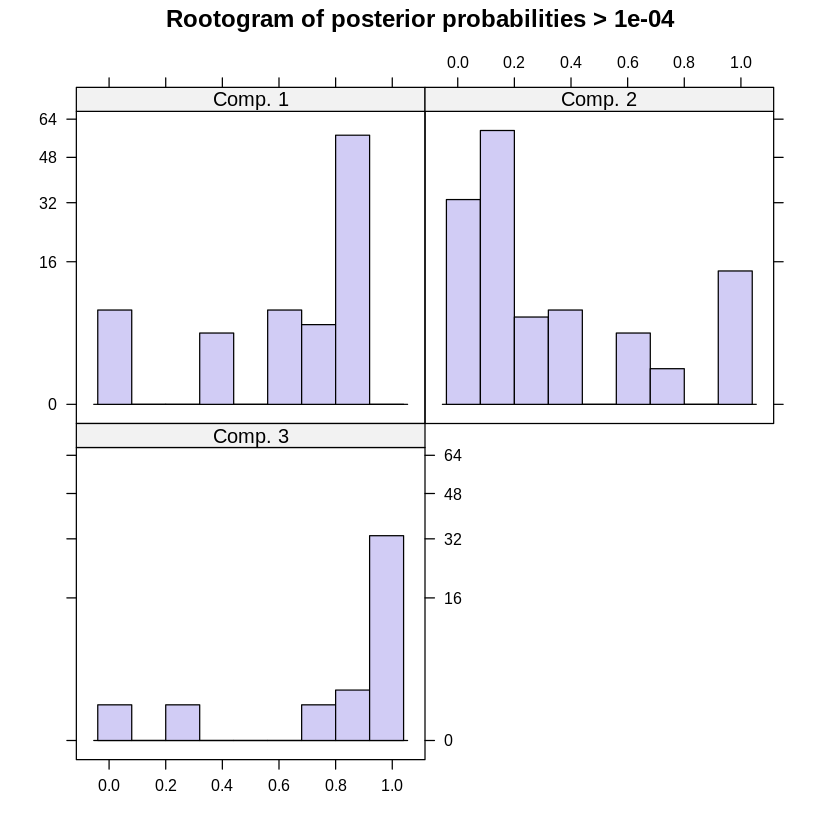

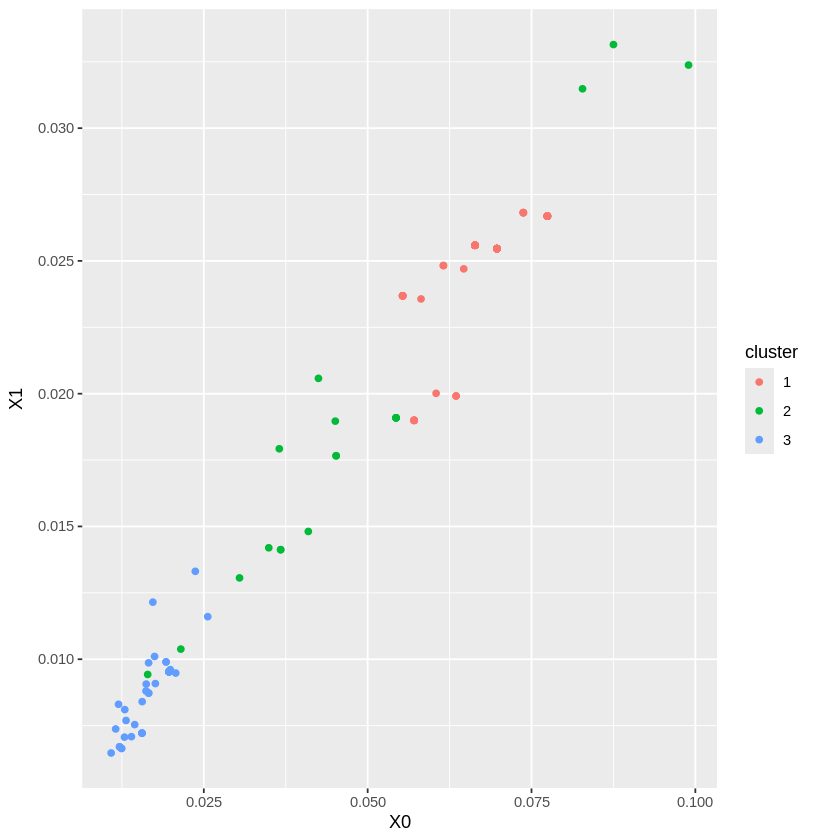

In [127]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2017.3 <- getModel(gmm2017, which =3)
summary(gmm2017.3)
parameters(gmm2017.3)
clusters(gmm2017.3)
# Plot the extracted model
plot(gmm2017.3)

dat17=dat.hsi[dat.hsi$year_x=="2017",]
dim(dat17)
dat17$cluster=as.character(clusters(gmm2017.3))

ggplot(dat17,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x == "2018", 
    ], model = FLXMRglm(), k = 4)

        prior size post>0 ratio
Comp.1 0.5462   77     83 0.928
Comp.2 0.0565    8     10 0.800
Comp.3 0.0850   12     15 0.800
Comp.4 0.3123   44     52 0.846

'log Lik.' 93.15558 (df=11)
AIC: -164.3112   BIC: -131.8748 


[1] 141 868

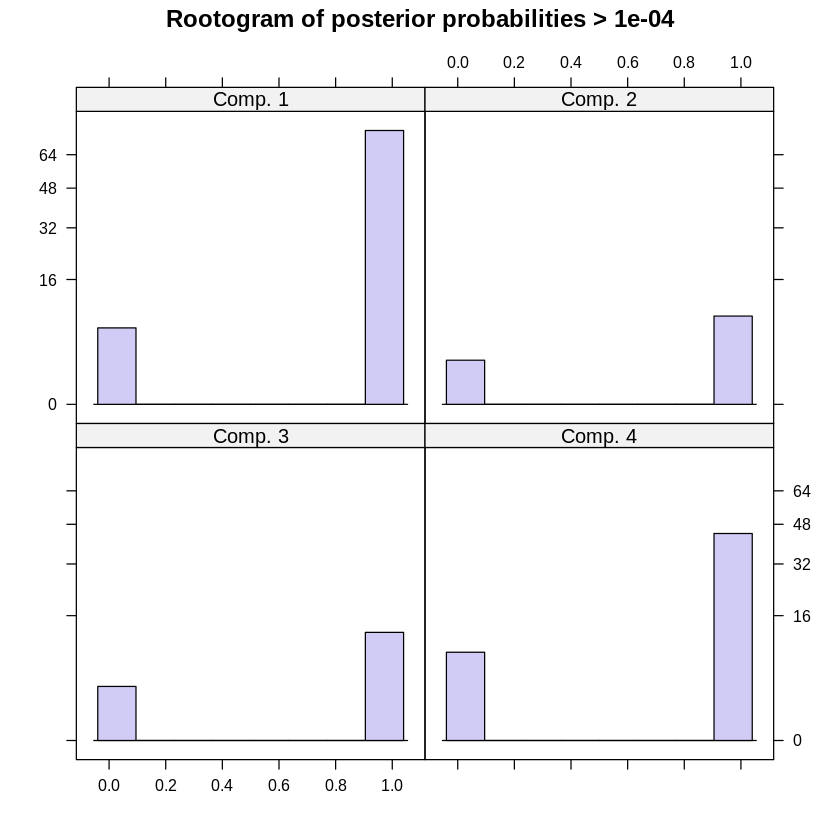

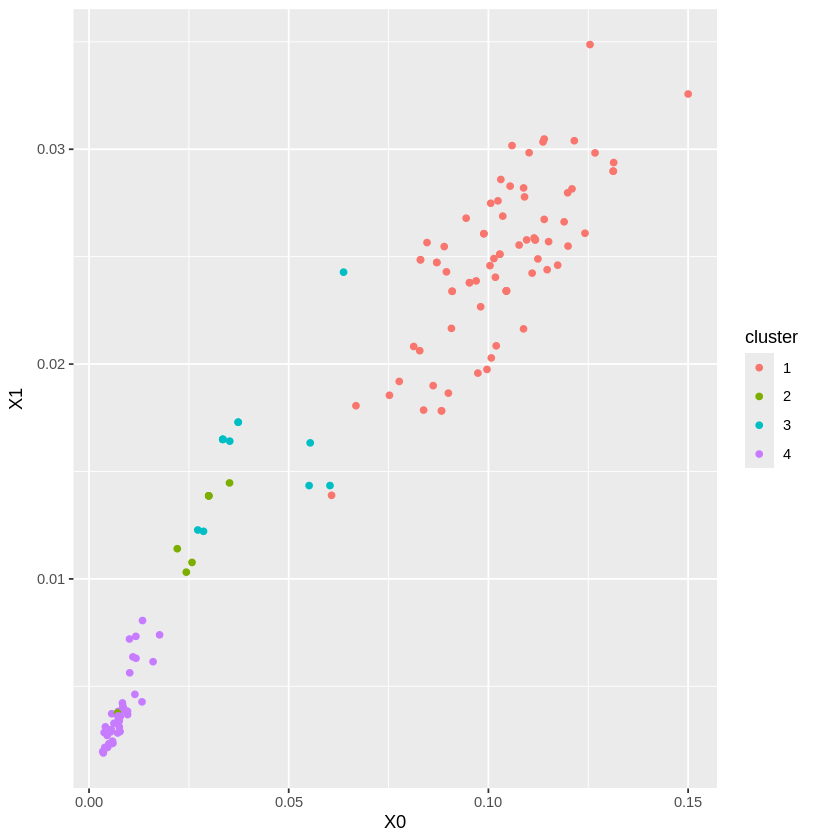

In [128]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2018.3 <- getModel(gmm2018, which =3)
summary(gmm2018.3)
# Plot the extracted model
plot(gmm2018.3)

dat18=dat.hsi[dat.hsi$year_x=="2018",]
dim(dat18)
dat18$cluster=as.character(clusters(gmm2018.3))

ggplot(dat18,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x == "2019", 
    ], model = FLXMRglm(), k = 4)

        prior size post>0 ratio
Comp.1 0.1788   29     43 0.674
Comp.2 0.1870   25     68 0.368
Comp.3 0.0868   13     15 0.867
Comp.4 0.5474   81     91 0.890

'log Lik.' 92.48624 (df=11)
AIC: -162.9725   BIC: -130.0031 


[1] 148 868

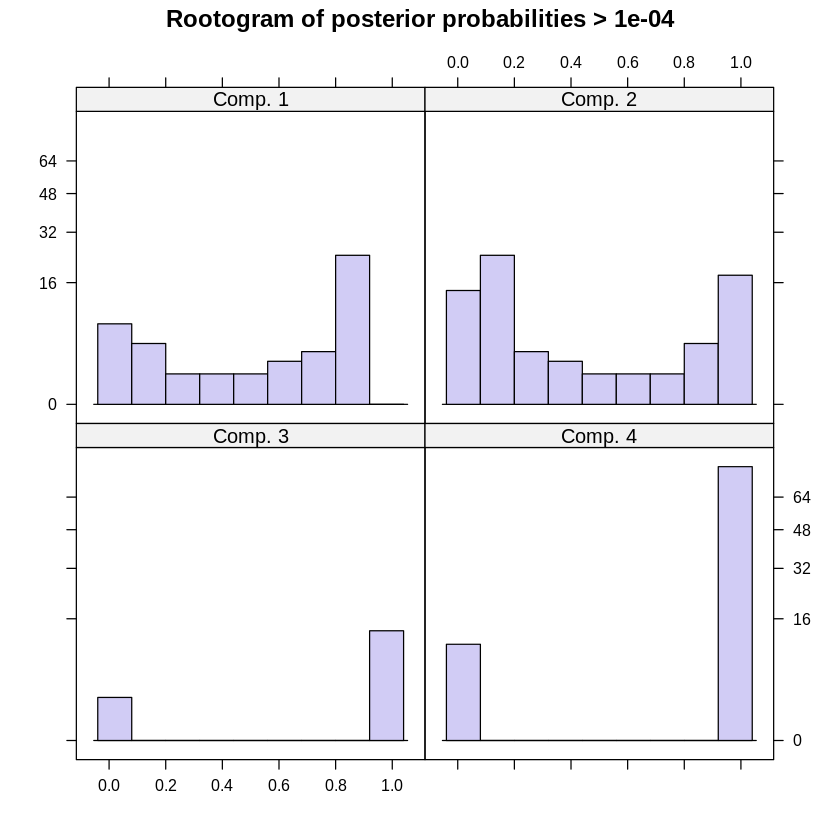

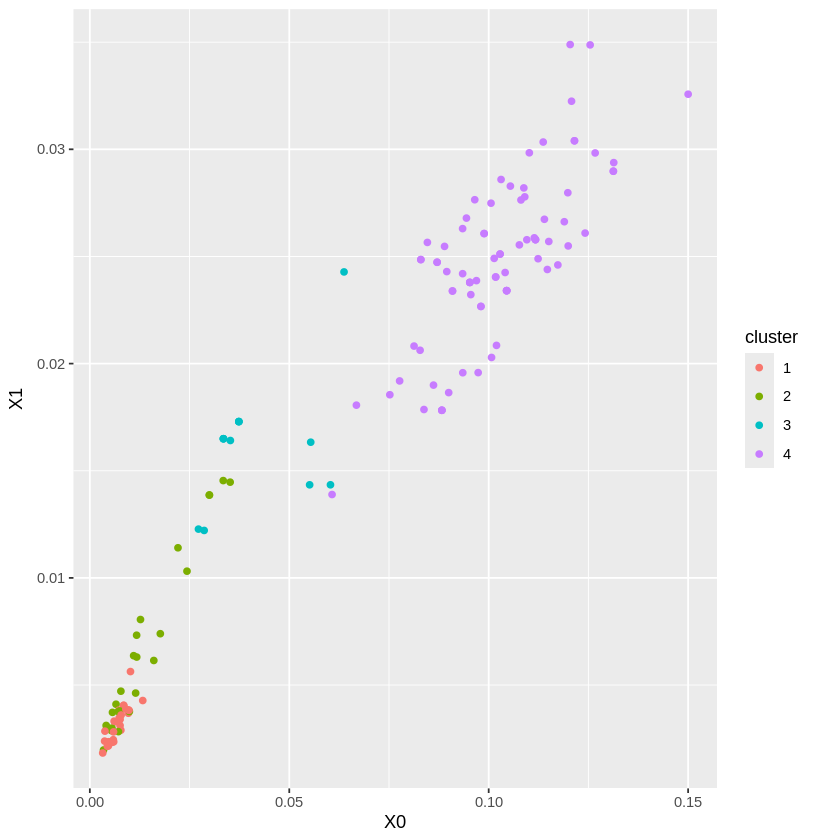

In [129]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2019.3 <- getModel(gmm2019, which =3)
summary(gmm2019.3)
# Plot the extracted model
plot(gmm2019.3)

dat19=dat.hsi[dat.hsi$year_x=="2019",]
dim(dat19)
dat19$cluster=as.character(clusters(gmm2019.3))

ggplot(dat19,aes(x=X0,y=X1,color=cluster))+
  geom_point()


Call:
stepFlexmix(X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10 ~ 1 | unitid, data = dat.hsi[dat.hsi$year_x == "2020", 
    ], model = FLXMRglm(), k = 4)

        prior size post>0 ratio
Comp.1 0.0996   13     69 0.188
Comp.2 0.0852   13     15 0.867
Comp.3 0.2720   43     49 0.878
Comp.4 0.5431   82     86 0.953

'log Lik.' 101.4941 (df=11)
AIC: -180.9883   BIC: -147.7982 


[1] 151 868

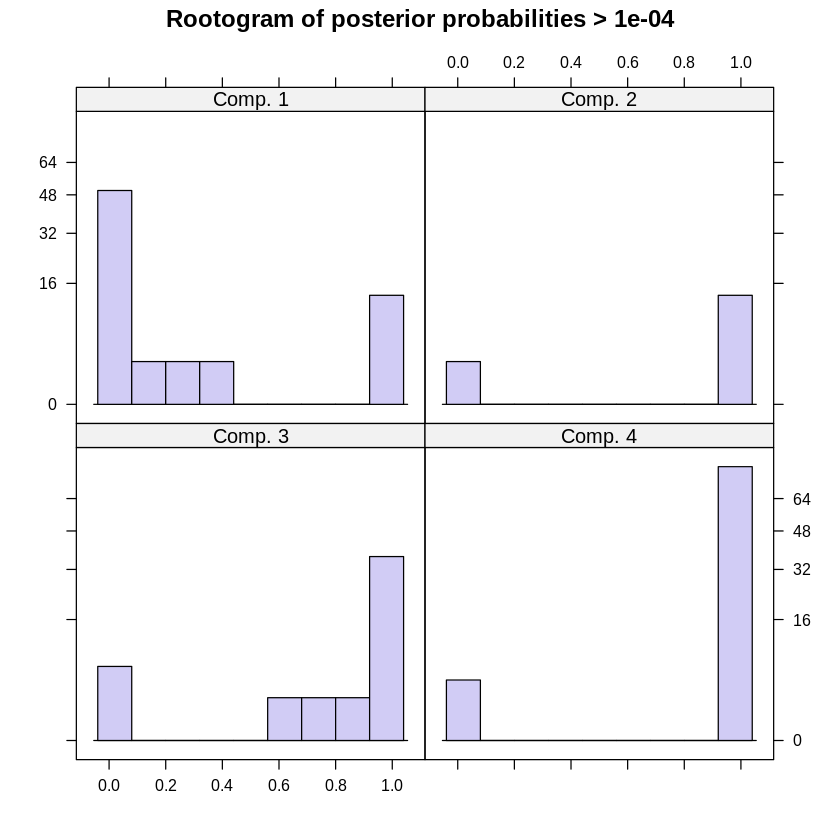

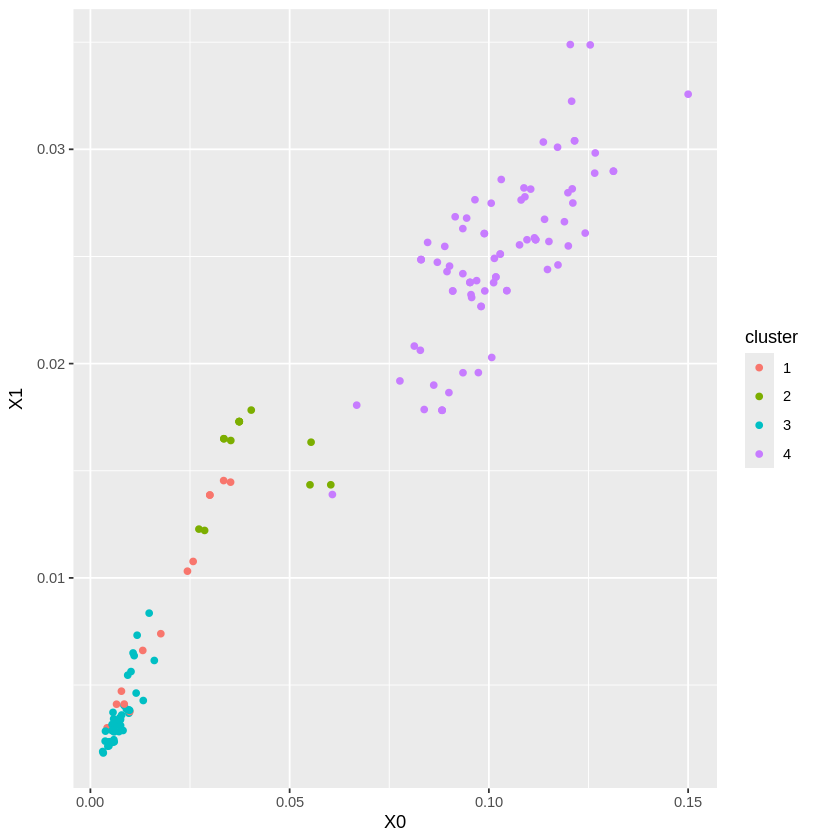

In [130]:
# Extract the model with 3 classes from the stepFlexmix object
gmm2020.3 <- getModel(gmm2020, which =3)
summary(gmm2020.3)
# Plot the extracted model
plot(gmm2020.3)

dat20=dat.hsi[dat.hsi$year_x=="2020",]
dim(dat20)
dat20$cluster=as.character(clusters(gmm2020.3))

ggplot(dat20,aes(x=X0,y=X1,color=cluster))+
  geom_point()